In [26]:
'''테크닉1 : 데이터를 읽어 들이자'''

customer_master = pd.read_csv("./pyda100-master/Chapter_1/customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [27]:
item_master = pd.read_csv("./pyda100-master/Chapter_1/item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [28]:
transaction_1 = pd.read_csv("./pyda100-master/Chapter_1/transaction_1.csv")
transaction_2 = pd.read_csv("./pyda100-master/Chapter_1/transaction_2.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [29]:
transaction_detail_1 = pd.read_csv("./pyda100-master/Chapter_1/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("./pyda100-master/Chapter_1/transaction_detail_2.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [30]:
'''테크닉2 : 데이터를 결합(유니언)해 보자'''

transaction = pd.concat([transaction_1, transaction_2])
print("transaction_1 length :", len(transaction_1))
print("transaction_2 length :", len(transaction_2))
print("transaction length :", len(transaction))
transaction.head()

transaction_1 length : 5000
transaction_2 length : 1786
transaction length : 6786


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [31]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2])
print("transaction_detail_1 length :", len(transaction_detail_1))
print("transaction_detail_2 length :", len(transaction_detail_2))
print("transaction_detail length :", len(transaction_detail))
transaction_detail.head()

transaction_detail_1 length : 5000
transaction_detail_2 length : 2144
transaction_detail length : 7144


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [32]:
'''테크닉3 : 매출 데이터끼리 결합(조인)해 보자'''

join_data = pd.merge(transaction_detail, transaction.loc[:, ["transaction_id", "payment_date", "customer_id", "price"]], on = "transaction_id", how = "left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,170000


In [33]:
'''테크닉4 : 마스터데이터를 결합(조인)해보자'''

join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,price,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,170000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [34]:
join_columns = list(join_data.columns)
# print(join_columns)
payment_date_index = join_columns.index("payment_date")
item_price_index = join_columns.index("item_price")

join_columns[payment_date_index] = "item_price"
join_columns[item_price_index] = "payment_date"

quantity_index = join_columns.index("quantity")
item_price_index = join_columns.index("item_price")

join_columns[quantity_index] = "item_price"
join_columns[item_price_index] = "quantity"

customer_id_index = join_columns.index("customer_id")
price_index = join_columns.index("price")

join_columns[customer_id_index] = "price"
join_columns[price_index] = "customer_id"

join_data = join_data[join_columns]

del join_data["price"]
join_data

,detail_id,transaction_id,item_id,item_price,quantity,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,payment_date
0,0,T0000000113,S005,210000,1,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,2019-02-01 01:36:57
1,1,T0000000114,S001,50000,1,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,2019-02-01 01:37:23
2,2,T0000000115,S003,120000,1,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,2019-02-01 02:34:19
3,3,T0000000116,S005,210000,1,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,2019-02-01 02:47:23
4,4,T0000000117,S002,85000,2,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,2019-02-01 04:33:46
5,5,T0000000118,S003,120000,1,GD372798,김희원,2019-01-24 7:40,fujimura_mitsunori@example.com,M,36,1983-07-18,서울특별시,PC-C,2019-02-01 04:36:50
6,6,T0000000119,S004,180000,1,IK782104,김상준,2019-01-14 11:46,enomoto_kaoru@example.com,M,58,1960-08-10,대구광역시,PC-D,2019-02-01 05:25:18
7,7,T0000000120,S001,50000,1,IK624245,김다원,2019-01-16 7:24,ezaki_girolamo@example.com,M,67,1951-08-24,서울특별시,PC-A,2019-02-01 06:22:39
8,8,T0000000121,S005,210000,1,HD218970,김성훈,2019-01-08 18:22,okada_toshiya@example.com,M,23,1996-06-11,광주광역시,PC-E,2019-02-01 06:40:14
9,9,T0000000122,S002,85000,1,AS912483,김태우,2019-01-09 9:06,tamayama_masami@example.com,F,22,1997-04-26,인천광역시,PC-B,2019-02-01 08:10:23


In [35]:
# 'join_data'의 'customer_id'열을 기준으로 중복되는 데이터가 있는지 확인
join_data.duplicated(["customer_id"])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7114    False
7115    False
7116     True
7117    False
7118    False
7119    False
7120    False
7121     True
7122    False
7123     True
7124    False
7125    False
7126    False
7127     True
7128     True
7129     True
7130     True
7131     True
7132    False
7133     True
7134     True
7135    False
7136     True
7137    False
7138     True
7139     True
7140     True
7141     True
7142     True
7143     True
Length: 7144, dtype: bool

In [36]:
'''테크닉 5 : 필요한 데이터 컬럼을 만들자'''

join_data["price"] = join_data["item_price"] * join_data["quantity"]
join_columns = list(join_data.columns)
join_columns.insert(5, join_columns.pop())
join_data = join_data[join_columns]
join_data

,detail_id,transaction_id,item_id,item_price,quantity,price,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,payment_date
0,0,T0000000113,S005,210000,1,210000,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,2019-02-01 01:36:57
1,1,T0000000114,S001,50000,1,50000,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,2019-02-01 01:37:23
2,2,T0000000115,S003,120000,1,120000,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,2019-02-01 02:34:19
3,3,T0000000116,S005,210000,1,210000,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,2019-02-01 02:47:23
4,4,T0000000117,S002,85000,2,170000,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,2019-02-01 04:33:46
5,5,T0000000118,S003,120000,1,120000,GD372798,김희원,2019-01-24 7:40,fujimura_mitsunori@example.com,M,36,1983-07-18,서울특별시,PC-C,2019-02-01 04:36:50
6,6,T0000000119,S004,180000,1,180000,IK782104,김상준,2019-01-14 11:46,enomoto_kaoru@example.com,M,58,1960-08-10,대구광역시,PC-D,2019-02-01 05:25:18
7,7,T0000000120,S001,50000,1,50000,IK624245,김다원,2019-01-16 7:24,ezaki_girolamo@example.com,M,67,1951-08-24,서울특별시,PC-A,2019-02-01 06:22:39
8,8,T0000000121,S005,210000,1,210000,HD218970,김성훈,2019-01-08 18:22,okada_toshiya@example.com,M,23,1996-06-11,광주광역시,PC-E,2019-02-01 06:40:14
9,9,T0000000122,S002,85000,1,85000,AS912483,김태우,2019-01-09 9:06,tamayama_masami@example.com,F,22,1997-04-26,인천광역시,PC-B,2019-02-01 08:10:23


In [37]:
'''테크닉 6 : 데이터를 검산하자'''

print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [38]:
'''테크닉 7 : 각종 통계량을 파악하자'''

# 각 컬럼의 null 개수 나타내기
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
item_price           0
quantity             0
price                0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
payment_date         0
dtype: int64

In [39]:
# 각 정량적 컬럼들에 대한 통계량 나타내기
join_data.describe()

,detail_id,item_price,quantity,price,age
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,121698.628219,1.199888,135937.150056,50.265677
std,2062.439494,64571.311830,0.513647,68511.453297,17.190314
min,0.000000,50000.000000,1.000000,50000.000000,20.000000
25%,1785.750000,50000.000000,1.000000,85000.000000,36.000000
50%,3571.500000,102500.000000,1.000000,120000.000000,50.000000
75%,5357.250000,187500.000000,1.000000,210000.000000,65.000000
max,7143.000000,210000.000000,4.000000,420000.000000,80.000000


In [40]:
# 데이터 셋 내 모든 컬럼의 데이터 타입 출력
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
item_price            int64
quantity              int64
price                 int64
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
payment_date         object
dtype: object

In [41]:
# 문자열 컬럼을 datetime형 컬럼으로 변형하는 방법, datetime형 컬럼을 지정한 format으로 나타내게 하는 방법
print(join_data["payment_date"].head(), "\n")

join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")

print(join_data["payment_month"].head())

0    2019-02-01 01:36:57
1    2019-02-01 01:37:23
2    2019-02-01 02:34:19
3    2019-02-01 02:47:23
4    2019-02-01 04:33:46
Name: payment_date, dtype: object 

0    201902
1    201902
2    201902
3    201902
4    201902
Name: payment_month, dtype: object


In [42]:
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [43]:
# dataframe에서 groupby절과 집계함수 사용하는 방법(월별 매출합 구하기)
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [44]:
# dataframe에서 groupby절과 집계함수 사용하는 방법(월별 매출합 및 팔린 상품 개수합 구하기)
join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [45]:
# 위 결과를 pivot table로 만드는 방법
pivot_table_for_graph = pd.pivot_table(join_data, index = "payment_month", columns = "item_name", values = "price", aggfunc="sum")
pivot_table_for_graph

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


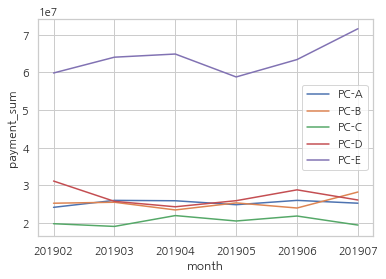

In [46]:
# 위 pivot table을 그래프로 나타내는 방법
%matplotlib inline

plt.figure()
plt.plot(list(pivot_table_for_graph.index), pivot_table_for_graph["PC-A"], label = "PC-A")
plt.plot(list(pivot_table_for_graph.index), pivot_table_for_graph["PC-B"], label = "PC-B")
plt.plot(list(pivot_table_for_graph.index), pivot_table_for_graph["PC-C"], label = "PC-C")
plt.plot(list(pivot_table_for_graph.index), pivot_table_for_graph["PC-D"], label = "PC-D")
plt.plot(list(pivot_table_for_graph.index), pivot_table_for_graph["PC-E"], label = "PC-E")
plt.xlabel("month")
plt.ylabel("payment_sum")
plt.legend()
plt.show()